# **Finanzas Computacionales **

# **Trabajo Final **

# **Juan Esteban Acosta Sandoval **



Librerias para desarrollar el trabajo 


In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import cvxpy as cp
!pip install yfinance
import yfinance as yf
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25595 sha256=b8ae79ec795037bb626610531956a935a7ac3c5d8f00fb6d78f48db2f8f55550
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built fitter


# El problema a realizar es ver como la acción de ecopetrol a venido a la baja y desde ahí realizar el manejo de datos, estadisticos descritivos y de visualización, realizar la optimización y la simulación de Monte Carlo 

In [ ]:
from google.colab import files
uploaded = files.upload()




Saving EC.xlsx to EC.xlsx


Se realizara la importación de datos de Excel a Colaboratory

In [ ]:
EC = pd.read_excel("/content/EC.xlsx",index_col = 0)
EC

,High,Low,Close,Adj Close,Volume,Unnamed: 6
Open,,,,,,
2017-11-20,11670000,11670000,11270000,11500000,7854057,2038300
2017-11-21,11600000,11680000,11520000,11560000,7895036,1253200
2017-11-22,11630000,11920000,11620000,11890000,8120413,1334800
2017-11-24,11940000,11980000,11730000,11750000,8024797,790600
2017-11-27,11640000,11940000,11500000,11880000,8113584,1834200
...,...,...,...,...,...,...
2022-11-14,10000000,10630000,10000000,10380000,10380000,2315600
2022-11-15,10590000,10590000,10180000,10360000,10360000,2617600
2022-11-16,10250000,10310000,9910000,9930000,9930000,2147500


# Organizar el activo 

Se realiza la formula para trar solo la columna de precios de EC y reliazar su grafica 

In [ ]:
EC = EC.loc[:,"Adj Close"]

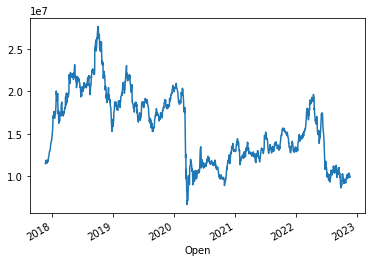

In [ ]:
EC.plot()

Retornos

In [ ]:
rEC = EC.pct_change().dropna()
rEC

Open
2017-11-21    0.005217
2017-11-22    0.028547
2017-11-24   -0.011775
2017-11-27    0.011064
2017-11-28   -0.027778
                ...   
2022-11-14    0.043216
2022-11-15   -0.001927
2022-11-16   -0.041506
2022-11-17    0.015106
2022-11-18   -0.018849
Name: Adj Close, Length: 1258, dtype: float64

Volatilidad


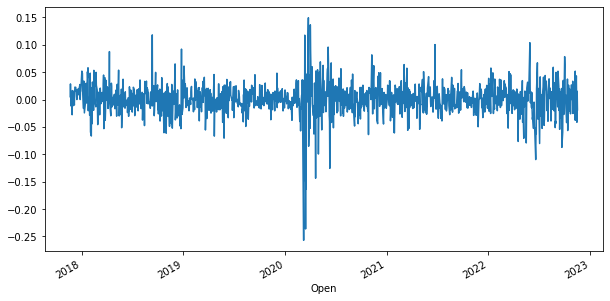

In [ ]:
rEC.plot(figsize = (10,5))


La volatilidad no es relativa ya que se puede evidenciar que entre los años 2020 y 2021 su comportamiento fue diferente

# Simulación de Monte Carlo 

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
mu = 100
sd = 10
simulations = 10000
ma = np.random.normal(mu, sd, simulations)

(array([7.81229483e-05, 3.90614742e-05, 2.34368845e-04, 3.90614742e-04,
        1.24996717e-03, 1.40621307e-03, 3.55459415e-03, 5.74203670e-03,
        9.57006117e-03, 1.34762086e-02, 1.93744912e-02, 2.60540033e-02,
        3.38662981e-02, 3.79677529e-02, 3.76943226e-02, 4.05848716e-02,
        3.74599537e-02, 3.23429006e-02, 2.75774008e-02, 2.21869173e-02,
        1.49214831e-02, 1.00778603e-02, 6.79669650e-03, 3.86708594e-03,
        1.95307371e-03, 1.17184422e-03, 5.46860638e-04, 2.73430319e-04,
        3.90614742e-05, 1.17184422e-04]),
 array([ 61.38983415,  63.94990138,  66.50996861,  69.07003584,
         71.63010307,  74.19017031,  76.75023754,  79.31030477,
         81.870372  ,  84.43043923,  86.99050647,  89.5505737 ,
         92.11064093,  94.67070816,  97.23077539,  99.79084262,
        102.35090986, 104.91097709, 107.47104432, 110.03111155,
        112.59117878, 115.15124602, 117.71131325, 120.27138048,
        122.83144771, 125.39151494, 127.95158217, 130.51164941,
      

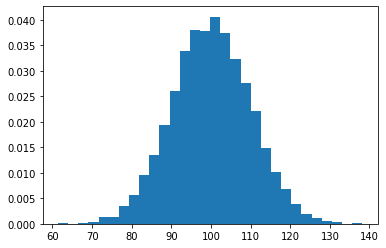

In [ ]:
plt.hist(ma,bins=30,density=True,label="Dist. empirica")

(array([7.81229483e-05, 3.90614742e-05, 2.34368845e-04, 3.90614742e-04,
        1.24996717e-03, 1.40621307e-03, 3.55459415e-03, 5.74203670e-03,
        9.57006117e-03, 1.34762086e-02, 1.93744912e-02, 2.60540033e-02,
        3.38662981e-02, 3.79677529e-02, 3.76943226e-02, 4.05848716e-02,
        3.74599537e-02, 3.23429006e-02, 2.75774008e-02, 2.21869173e-02,
        1.49214831e-02, 1.00778603e-02, 6.79669650e-03, 3.86708594e-03,
        1.95307371e-03, 1.17184422e-03, 5.46860638e-04, 2.73430319e-04,
        3.90614742e-05, 1.17184422e-04]),
 array([ 61.38983415,  63.94990138,  66.50996861,  69.07003584,
         71.63010307,  74.19017031,  76.75023754,  79.31030477,
         81.870372  ,  84.43043923,  86.99050647,  89.5505737 ,
         92.11064093,  94.67070816,  97.23077539,  99.79084262,
        102.35090986, 104.91097709, 107.47104432, 110.03111155,
        112.59117878, 115.15124602, 117.71131325, 120.27138048,
        122.83144771, 125.39151494, 127.95158217, 130.51164941,
      

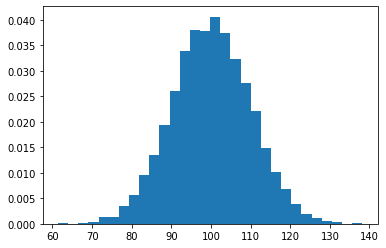

In [ ]:
np.random.uniform()
plt.hist(ma,bins=30,density=True,label="Dist. empirica")

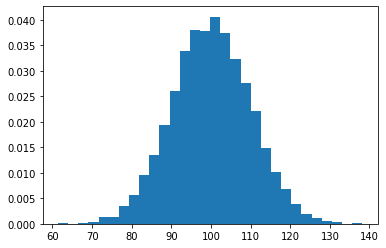

In [ ]:
np.random.normal(100,0.3,10000)
#(Valor, probabilidad, tamaño de la muestra)
plt.hist(ma,bins=30,density=True,label="Dist.Empirica");

In [ ]:
# 1. Define inputs
N = 100000
inside = []
# 2. Generate inputs randomly/ Gerenamos los uneros aleatoris para la abse y para la altura
for i in range(N):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if np.sqrt(x**2 + y**2) < 1: # 3. Computation on the inputs
        inside.append((x, y))

Como conclusión de Monte Carlo y las simulaciones realizadas podemos decir que si bien es no es tan bueno invertir en EC por ls precios que presenta en diferentes de las simulaciones tambien nos muestra un riesgo muy alto debido a que su volatilidad y sus bajas que afectan de manera negativa al inversionista.